Importamos todo lo necesario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Cargamos los datos

In [2]:
print("Cargamos el csv con la librería pandas")
dataframe = pd.read_csv('../data/regression_data.csv', delimiter=';')
print(dataframe.head())
print("Examinamos el csv")
print('Las columnas son:\n')
print(dataframe.columns)
print('La descripción del csv es:\n')
print(dataframe.describe())

Cargamos el csv con la librería pandas
           id        date  bedrooms bathrooms  sqft_living  sqft_lot floors  \
0  7129300520  13/10/2014         3         1         1180      5650      1   
1  6414100192  09/12/2014         3      2,25         2570      7242      2   
2  5631500400  25/02/2015         2         1          770     10000      1   
3  2487200875  09/12/2014         4         3         1960      5000      1   
4  1954400510  18/02/2015         3         2         1680      8080      1   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated  zipcode     

Observaciones:

Las columnas no numéricas son : date, bathrooms, floor, lat, long
Como queremos predecir el precio, la columna que va a ir por separado es price
Para predecir el precio necesitamos: bedrooms, bathrooms, sqft, floors, condiciones, grade, year_built, year_renovate, waterview
lat, long y zipcode no nos influye ya que estan todas las casas en la misma zona de Seattle, Tacoma y alrededores, gracias a Google Maps

In [3]:
print("Hacemos una copia de los datos")
copia_dataframe = dataframe.copy()
print("Los datos que son floats que no tengan sentido, como 2,5 baños, vamos a pasarlos a integers:")

Hacemos una copia de los datos
Los datos que son floats que no tengan sentido, como 2,5 baños, vamos a pasarlos a integers:


In [4]:
def redondear_datos(columna):
    for i in range(len(dataframe)):
        if ',' in dataframe[columna][i]:
            dataframe[columna][i] = float(
                dataframe[columna][i].replace(',', '.'))
            dataframe[columna][i] = round(dataframe[columna][i])
        else:
            dataframe[columna][i] = int(dataframe[columna][i])
    return dataframe


datos_a_redondear = ['bathrooms', 'floors']
for i in datos_a_redondear:
    redondear_datos(i)
    print(dataframe[i])

0        1
1        2
2        1
3        3
4        2
        ..
21592    2
21593    2
21594    1
21595    2
21596    1
Name: bathrooms, Length: 21597, dtype: object
0        1
1        2
2        1
3        1
4        1
        ..
21592    3
21593    2
21594    2
21595    2
21596    2
Name: floors, Length: 21597, dtype: object


Ahora vamos a quitar las columnas que no nos hacen falta: lat, long, date, zipcode

In [5]:

dataframe = dataframe.drop(columns=['date', 'lat', 'long'], axis=1)

Para facilitar el análisis, vamos a agrupar todas las columnas que contengan mediciones en metros cuadrados, creando así una única columna con todos los metros cuadrados de la casa.
Tendremos al final dos columnas: la medida del terreno (lot) y la medida de la casa (living)
No nos interesan las medidas anteriores a las reformas ya que no existen.
above y basement los quitamos ya que living es la suma de estas, y en el precio influyen los metos cuadrados totales

In [6]:
dataframe = dataframe.drop(columns=['sqft_above', 'sqft_basement',
                                    'sqft_living', 'sqft_lot'], axis=1)
print(dataframe.head())
print(dataframe.columns)

           id  bedrooms bathrooms floors  waterfront  view  condition  grade  \
0  7129300520         3         1      1           0     0          3      7   
1  6414100192         3         2      2           0     0          3      7   
2  5631500400         2         1      1           0     0          3      6   
3  2487200875         4         3      1           0     0          5      7   
4  1954400510         3         2      1           0     0          3      8   

   yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15   price  
0      1955             0    98178           1340        5650  221900  
1      1951          1991    98125           1690        7639  538000  
2      1933             0    98028           2720        8062  180000  
3      1965             0    98136           1360        5000  604000  
4      1987             0    98074           1800        7503  510000  
Index(['id', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition

Las columnas que tengan que ver con numero de habitaciones, las podemos agrupar para simplificar los cálculos
Creamos una nueva columna llamada habitaciones que será la suma de las columnas bedrooms y bathrooms

In [7]:
dataframe['rooms'] = 0
for i in range(len(dataframe['bedrooms'])):
    dataframe['rooms'][i] = int(
        dataframe['bedrooms'][i]) + int(dataframe['bathrooms'][i])

Exportamos el csv organizado y limpio

In [8]:
dataframe.to_csv('../data/regression_data_clean.csv', index=False)

Cargamos el csv limpio

In [9]:

dataframe_regresion = pd.read_csv('../data/regression_data_clean.csv', delimiter=',')

How many rows of data do you have?

In [10]:
print(dataframe_regresion.shape)

(21597, 15)


Find the unique values of the following columns:

    - What are the unique values in the column `bedrooms`?

    - What are the unique values in the column `bathrooms`?

    - What are the unique values in the column `floors`?

    - What are the unique values in the column `condition`?
    
    - What are the unique values in the column `grade`?

In [11]:
valores_unicos = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']

for i in valores_unicos:
    print(dataframe_regresion[i].unique())

[ 3  2  4  5  1  6  7  8  9 11 10 33]
[1 2 3 4 5 6 0 7 8]
[1 2 3 4]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13]


Arrange the data in decreasing order by the price of the house. Return only the IDs of the top 10 most expensive houses in your data.

In [12]:
dataframe_regresion = dataframe_regresion.sort_values(
    by='price', ascending=False)
print(dataframe_regresion['id'].head(10))

7245    6762700020
3910    9808700762
9245    9208900037
4407    2470100110
1446    8907500070
1313    7558700030
1162    1247600105
8085    1924059029
2624    7738500731
8629    3835500195
Name: id, dtype: int64


What is the average price of all the properties in your data?

In [13]:
print(dataframe_regresion['price'].mean().__round__(2))

540296.57


In this exercise use a simple `groupby` to check the properties of some of the categorical variables in our data

    - What is the average price of the houses grouped by bedrooms? The returned result should have only two columns: `Bedrooms` and `Average price`.
    
    - What is the average `sqft_living` of the houses grouped by bedrooms? The returned result should have only two columns, `Bedrooms` and `Average_sqft_living`.
    
    - What is the average price of the houses with a waterfront and without a waterfront? The returned result should have only two columns, `Waterfront` and `Average_price`.
    
    - Is there any correlation between the columns `condition` and `grade`? Also, create a plot to visually check if there is a positive correlation or negative correlation or no correlation between both variables.
    
    - Get the number of houses in each category (ie number of houses for a given `condition`) to assess if that category is well represented in the dataset to include it in your analysis. For eg. If the category is under-represented as compared to other categories, ignore that category in this analysis""")


bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64
bedrooms
1     1452.163265
2     1503.785507
3     1835.443506
4     2291.124818
5     2442.706433
6     2280.176471
7     2335.263158
8     2265.384615
9     2091.333333
10    2193.333333
11    1420.000000
33    1330.000000
Name: sqft_living15, dtype: float64
waterfront
0    5.317623e+05
1    1.662524e+06
Name: price, dtype: float64
condition
1    5.965517
2    6.541176
3    7.827318
4    7.382596
5    7.320988
Name: grade, dtype: float64
795000620     3
6632900574    2
1781500435    2
641900050     2
7409700215    2
             ..
4477000270    1
8648700450    1
6430500291    1
3222059130    1
40000362      1
Name: id, Length: 21420, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38


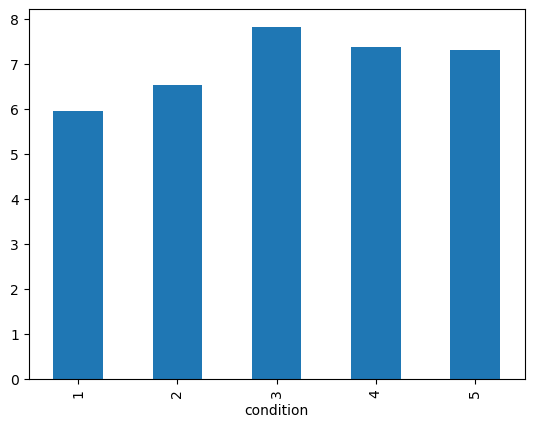

In [14]:
print(dataframe_regresion.groupby('bedrooms')['price'].mean())
print(dataframe_regresion.groupby('bedrooms')['sqft_living15'].mean())
print(dataframe_regresion.groupby('waterfront')['price'].mean())
print(dataframe_regresion.groupby('condition')['grade'].mean())
dataframe_regresion.groupby('condition')['grade'].mean().plot(kind='bar')

categorias = ["id", "bedrooms", "bathrooms", "floors", "waterfront", "view",
              "condition", "grade", "yr_built", "sqft_living15", "sqft_lot15", "price", "rooms"]
for i in categorias:
    print(dataframe_regresion[i].value_counts())

One of the customers is only interested in the following houses:

    - Number of bedrooms either 3 or 4
    
    - Bathrooms more than 3
    
    - One Floor
    
    - No waterfront
    
    - Condition should be 3 at least
    
    - Grade should be 5 at least
    
    - Price smaller than 300000""")

In [15]:
data_cliente = dataframe[(dataframe['bedrooms'] == 3) | (dataframe['bedrooms'] == 4) & (dataframe['bathrooms'] > 3) & (dataframe['floors'] == 1) & (dataframe['waterfront'] == 0) & (dataframe['condition'] >= 3) & (dataframe['grade'] >= 5) & (dataframe['price'] < 300000)]

print(data_cliente)

               id  bedrooms bathrooms floors  waterfront  view  condition  \
0      7129300520         3         1      1           0     0          3   
1      6414100192         3         2      2           0     0          3   
4      1954400510         3         2      1           0     0          3   
6      1321400060         3         2      2           0     0          3   
7      2008000270         3         2      1           0     0          3   
...           ...       ...       ...    ...         ...   ...        ...   
21587  7852140040         3         2      2           0     0          3   
21588  9834201367         3         2      3           0     0          3   
21591  2997800021         3         2      2           0     0          3   
21592   263000018         3         2      3           0     0          3   
21595   291310100         3         2      2           0     0          3   

       grade  yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \

Your manager wants to find out the list of properties whose prices are twice more than the average of all the properties in the database. Write code to show them the list of such properties.

In [16]:
def manager():
    dataframe_manager = dataframe_regresion[dataframe_regresion['price']
                                            > dataframe_regresion['price'].mean() * 2]
    return dataframe_manager


print(manager())

               id  bedrooms  bathrooms  floors  waterfront  view  condition  \
7245   6762700020         6          8       2           0     3          4   
3910   9808700762         5          4       2           1     2          3   
9245   9208900037         6          8       2           0     4          3   
4407   2470100110         5          6       2           0     0          3   
1446   8907500070         5          5       2           0     4          3   
...           ...       ...        ...     ...         ...   ...        ...   
15546  1326059182         5          3       2           0     0          3   
5060   4385700660         3          2       2           0     0          5   
12549  3760500730         4          3       2           0     3          4   
8664   4151800530         4          2       2           0     0          3   
18761  4147200040         5          2       1           0     0          4   

       grade  yr_built  yr_renovated  zipcode  sqft

Most customers are interested in properties with three or four bedrooms. What is the difference in average prices of the properties with three and four bedrooms? In this case you can simply use a `groupby` to check the prices for those particular houses

In [17]:
print(dataframe_regresion.groupby('bedrooms')['price'].mean())

bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64


What are the different locations where properties are available in your database? (distinct zip codes).

In [18]:
print(dataframe["zipcode"].unique())
print("Las localizaciones son por la zona de Seattle, Tacoma y alrededores")

[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]
Las localizaciones son por la zona de Seattle, Tacoma y alrededores


Show all the properties that were renovated.

In [19]:
print(dataframe[dataframe['yr_renovated'] != 0])

               id  bedrooms bathrooms floors  waterfront  view  condition  \
1      6414100192         3         2      2           0     0          3   
35     9547205180         3         2      2           0     0          3   
95     1483300570         4         2      1           0     0          3   
103    2450000295         3         2      2           0     0          3   
115    3626039325         3         4      2           0     0          3   
...           ...       ...       ...    ...         ...   ...        ...   
19606  7351200295         3         2      2           1     4          3   
20041   126039256         3         2      2           0     0          3   
20428  4305600360         4         2      1           0     0          3   
20431  3319500628         3         2      2           0     0          3   
20946  1278000210         2         1      1           0     0          3   

       grade  yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \

Provide the details of the property that is the 11th most expensive property in your database.

In [20]:
print(dataframe_regresion.sort_values(by='price', ascending=False).iloc[10])

id               6065300370
bedrooms                  5
bathrooms                 6
floors                    2
waterfront                0
view                      0
condition                 3
grade                    12
yr_built               2003
yr_renovated              0
zipcode               98006
sqft_living15          4740
sqft_lot15            19329
price               4210000
rooms                    11
Name: 12358, dtype: int64
